In [ ]:
import numpy as np
from google.colab import files
from zipfile import ZipFile
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
uploaded = files.upload()

Saving test_1.zip to test_1.zip
Saving train_1.zip to train_1.zip
Saving val_1.zip to val_1.zip


In [ ]:
file1='/content/train_1.zip'
file2='/content/val_1.zip'
with ZipFile(file1,'r') as zip_ref:
  zip_ref.extractall('train_1')
with ZipFile(file2,'r') as zip_ref:
  zip_ref.extractall('val_1')
print('done')

done


In [ ]:
path_train='/content/train_1/train_1'
img_tensors = []
for img_file in os.listdir(path_train):
    img_path = os.path.join(path_train, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
train = tf.stack(img_tensors)  # Convertir la liste des tenseurs en un seul tenseur
print(train.shape)

(87, 350, 350, 3)


In [ ]:
path_val = '/content/val_1/val_1'
img_tensors = []
for img_file in os.listdir(path_val):
    img_path = os.path.join(path_val, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
val = tf.stack(img_tensors)
print(val.shape)

(11, 350, 350, 3)


In [ ]:
input_shape=(350, 350, 3)
encoder= keras.Input(shape=input_shape) #encodeur
x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(encoder)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(2)(x)
x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(128, 3, activation='relu', padding='same')(encoded) #decodeur
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D(2)(x)
x = keras.layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x=  keras.layers.experimental.preprocessing.Resizing(350, 350)(x)
decoded = keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(encoder, decoded)

In [ ]:
autoencoder.summary() #la résolution d'image en sortie doit etre 350*350

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 350, 350, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 87, 87, 64)        18496 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = autoencoder.fit(train, train, epochs=10, batch_size=10, validation_data=(val, val), callbacks=[early_stopping])


Epoch 1/10
9/9 [==============================] - 38s 4s/step - loss: 0.0773 - val_loss: 0.0547
Epoch 2/10
9/9 [==============================] - 36s 4s/step - loss: 0.0489 - val_loss: 0.0327
Epoch 3/10
9/9 [==============================] - 34s 4s/step - loss: 0.0312 - val_loss: 0.0216
Epoch 4/10
9/9 [==============================] - 35s 4s/step - loss: 0.0275 - val_loss: 0.0192
Epoch 5/10
9/9 [==============================] - 34s 4s/step - loss: 0.0235 - val_loss: 0.0173
Epoch 6/10
9/9 [==============================] - 35s 4s/step - loss: 0.0211 - val_loss: 0.0152
Epoch 7/10
9/9 [==============================] - 35s 4s/step - loss: 0.0189 - val_loss: 0.0161
Epoch 8/10
9/9 [==============================] - 33s 4s/step - loss: 0.0164 - val_loss: 0.0142
Epoch 9/10
9/9 [==============================] - 35s 4s/step - loss: 0.0143 - val_loss: 0.0131
Epoch 10/10
9/9 [==============================] - 35s 4s/step - loss: 0.0139 - val_loss: 0.0127


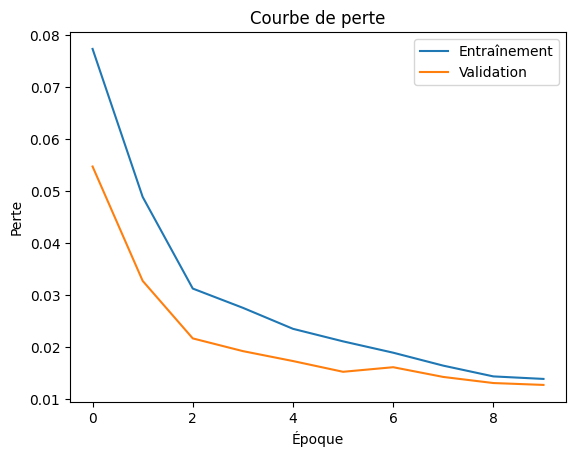

In [ ]:
history = autoencoder.history

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Validation'], loc='upper right')
plt.show()

In [ ]:
file3='/content/test_1.zip'
with ZipFile(file3,'r') as zip_ref:
  zip_ref.extractall('test')
print('done')

done


In [ ]:
path_test = '/content/test/test_1'
img_tensors = []
for img_file in os.listdir(path_test):
    img_path = os.path.join(path_test, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
test = tf.stack(img_tensors)
print(test.shape)

(11, 350, 350, 3)


In [ ]:
reconstructed = autoencoder.predict(test)
erreurs_reconstruction = np.mean(np.square(test - reconstructed), axis=(1, 2, 3))
print(erreurs_reconstruction)

1/1 [==============================] - 1s 1s/step
[0.01183051 0.01181428 0.00427882 0.01575607 0.00788993 0.01876823
 0.01699954 0.01303618 0.01928209 0.00654776 0.00502794]


In [ ]:
for i, erreur_reconstruction in enumerate(erreurs_reconstruction):
    print("L'erreur de reconstruction à l'indice", i, "est égale à:", erreur_reconstruction)

    if erreur_reconstruction <= seuil:
        print('Patiente Malade')
    else:
        print('Patiente Saine')

L'erreur de reconstruction à l'indice 0 est égale à: 0.011830512
Patiente Saine
L'erreur de reconstruction à l'indice 1 est égale à: 0.011814283
Patiente Saine
L'erreur de reconstruction à l'indice 2 est égale à: 0.004278817
Patiente Malade
L'erreur de reconstruction à l'indice 3 est égale à: 0.015756067
Patiente Saine
L'erreur de reconstruction à l'indice 4 est égale à: 0.007889935
Patiente Malade
L'erreur de reconstruction à l'indice 5 est égale à: 0.018768227
Patiente Saine
L'erreur de reconstruction à l'indice 6 est égale à: 0.016999535
Patiente Saine
L'erreur de reconstruction à l'indice 7 est égale à: 0.013036185
Patiente Saine
L'erreur de reconstruction à l'indice 8 est égale à: 0.019282093
Patiente Saine
L'erreur de reconstruction à l'indice 9 est égale à: 0.0065477593
Patiente Malade
L'erreur de reconstruction à l'indice 10 est égale à: 0.0050279377
Patiente Malade


In [ ]:
print(min(erreurs_reconstruction)) #pour voir le point de départ du seuil
print(max(erreurs_reconstruction))

0.0043176995
0.01739836


In [ ]:
seuil= 0.011

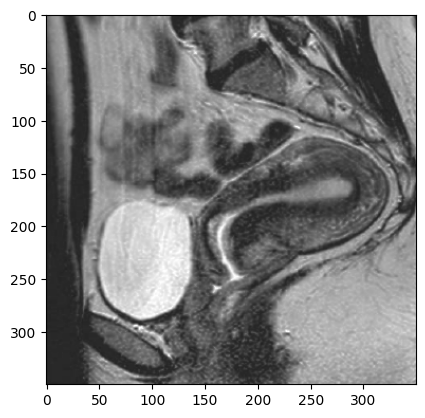

In [ ]:
size= (350, 350)  #Charger l'image et l'afficher
img_path = '/content/normalpelv.png'
img_test = cv2.imread(img_path)
img_norm = img_test.astype(np.float32) #normalisation
img_norm /= 255.0
resized_img = cv2.resize(img_norm, size)
plt.imshow(resized_img, cmap='gray')
plt.show()

In [ ]:
tensor = tf.convert_to_tensor(resized_img) #conversion de l'image en tenseur
tensor = tf.expand_dims(tensor, axis=0) #le tenseur doit etre en 4D
print(tensor.shape)

(1, 350, 350, 3)


1/1 [==============================] - 0s 183ms/step


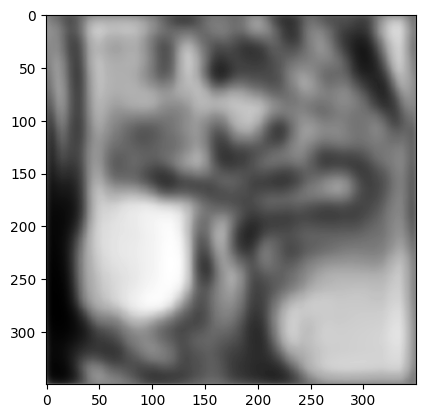

In [ ]:
reconstruction = autoencoder.predict(tensor)
generated_img = np.squeeze(reconstruction)  # Si nécessaire, supprimez les dimensions superflues
generated_img = generated_img * 255
generated_img = generated_img.astype(np.uint8)
import matplotlib.pyplot as plt
plt.imshow(generated_img, cmap='gray')
plt.show()

In [ ]:
erreur_reconstruction = np.mean(np.square(tensor - reconstruction))
print(" l'erreur de reconstruction est égale à:", erreur_reconstruction)
if erreur_reconstruction > seuil:
    print('Patiente Saine')
else:
    print('Patiente Malade')

 l'erreur de reconstruction est égale à: 0.011936943
Patiente Saine


In [ ]:
file4='/content/test_0.zip'
with ZipFile(file4,'r') as zip_ref:
  zip_ref.extractall('stest')
print('done')

done


In [ ]:
path_stest = '/content/stest/test_0'
img_tensors = []
for img_file in os.listdir(path_stest):
    img_path = os.path.join(path_stest, img_file)
    img = cv2.imread(img_path)
    image = img.astype(np.float32)
    image /= 255.0
    img_tensor = tf.convert_to_tensor(image)
    img_tensors.append(img_tensor)
stest = tf.stack(img_tensors)
print(stest.shape)

(11, 350, 350, 3)


In [ ]:
reconstructed = autoencoder.predict(stest)
erreurs_reconstruction = np.mean(np.square(stest - reconstructed), axis=(1, 2, 3))
print(erreurs_reconstruction)

1/1 [==============================] - 1s 1s/step
[0.0095691  0.01772887 0.01661349 0.03787903 0.00924917 0.01154235
 0.01332244 0.01061629 0.01070059 0.00660993 0.01041687]


In [ ]:
for i, erreur_reconstruction in enumerate(erreurs_reconstruction):
    print("L'erreur de reconstruction à l'indice", i, "est égale à:", erreur_reconstruction)

    if erreur_reconstruction <= seuil:
        print('Patiente Malade')
    else:
        print('Patiente Saine')

L'erreur de reconstruction à l'indice 0 est égale à: 0.009569101
Patiente Malade
L'erreur de reconstruction à l'indice 1 est égale à: 0.017728873
Patiente Saine
L'erreur de reconstruction à l'indice 2 est égale à: 0.016613489
Patiente Saine
L'erreur de reconstruction à l'indice 3 est égale à: 0.03787903
Patiente Saine
L'erreur de reconstruction à l'indice 4 est égale à: 0.009249169
Patiente Malade
L'erreur de reconstruction à l'indice 5 est égale à: 0.011542352
Patiente Saine
L'erreur de reconstruction à l'indice 6 est égale à: 0.013322437
Patiente Saine
L'erreur de reconstruction à l'indice 7 est égale à: 0.01061629
Patiente Malade
L'erreur de reconstruction à l'indice 8 est égale à: 0.010700587
Patiente Malade
L'erreur de reconstruction à l'indice 9 est égale à: 0.0066099344
Patiente Malade
L'erreur de reconstruction à l'indice 10 est égale à: 0.010416865
Patiente Malade
